## Demonstration of Univariate Gradient Descent

This jupyter notebook is part of a [collection of notebooks](../index.ipynb) on various topics of Data-Driven Signal Processing. Please direct questions and suggestions to [Sascha.Spors@uni-rostock.de](mailto:Sascha.Spors@uni-rostock.de).

This notebook illustrates the Gradient Descent algorithm at the example of finding local minima of a non-convex univariate function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Definition of Function and its Gradient

Lets define a non-convex polynomial function with local extrema and compute its gradient

In [2]:
P = 4  # order of polynomial function

coeffs = np.polyfit([0, 1, 3, 5, 7], [5, 2, 3, 1, 5], 4)

function = np.poly1d(coeffs)
gradient = function.deriv()
stationary_points = gradient.r

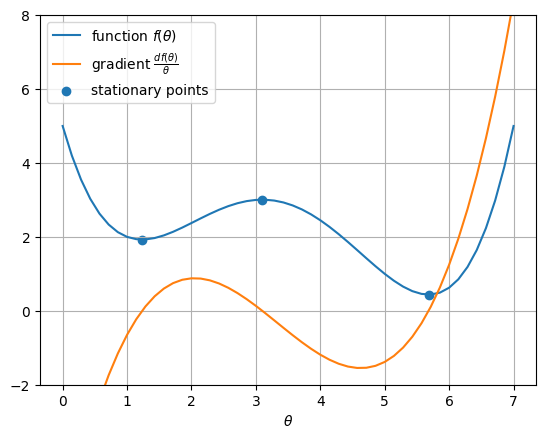

In [3]:
theta = np.linspace(0, 7)

plt.plot(theta, function(theta), label=r'function $f(\theta)$')
plt.plot(theta, gradient(theta),
         label=r'gradient $\frac{d f(\theta)}{\theta}$')
plt.scatter(stationary_points, function(
    stationary_points), label='stationary points')

plt.xlabel(r'$\theta$')
plt.ylim([-2, 8])
plt.legend()
plt.grid()

### Finding Local Minimum using Gradient Descent

First a function is defined which implements the Gradient descent iteration

In [4]:
def gradient_descent(gradient, theta_0, lr=0.01, max_iter=100, tol=1e-6):

    theta_min = theta_0
    history = [theta_0]

    for _ in range(max_iter):
        delta = -lr * gradient(theta_min)
        if np.abs(delta) <= tol:
            break
        theta_min += delta
        history.append(theta_min)

    return history

Now a local minimum of the function is searched starting from a chosen initial point

In [5]:
history = gradient_descent(gradient, 0, lr=0.1, max_iter=1000)

print('Stationary points of function are {}'.format(stationary_points))
print('Estimated local minimum is {0:.4f}'.format(history[-1]))

Stationary points of function are [5.68198    3.09932261 1.23340328]
Estimated local minimum is 1.2334


Lets illustrate the convergence of the algorithm by plotting the result of the individual iterations

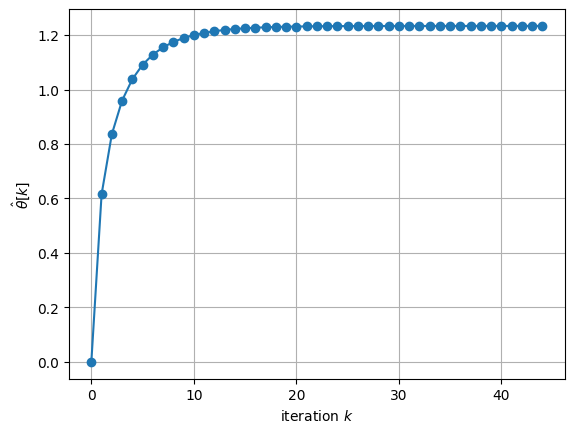

In [6]:
plt.plot(history, marker='o')

plt.xlabel(r'iteration $k$')
plt.ylabel(r'$\hat{\theta}[k]$')
plt.grid()

As alternative visualisation of the iterations, the results of the individual iterations are plotted onto the function 

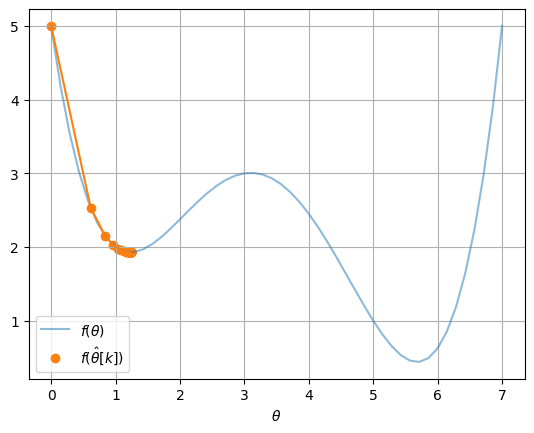

In [7]:
plt.plot(theta, function(theta), label=r'$f(\theta)$', alpha=.5)
plt.scatter(history, function(history),
            label=r'$f(\hat{\theta}[k])$', color='C1')
plt.plot(history, function(history), color='C1')

plt.xlabel(r'$\theta$')
plt.grid()
plt.legend()

**Copyright**

This notebook is provided as [Open Educational Resource](https://de.wikipedia.org/wiki/Open_Educational_Resources).
The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/)
, the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: Sascha Spors, Data driven audio signal processing - Lecture supplementals.